<a href="https://colab.research.google.com/github/Sachin1801/RoboAdvisors-Systematic_Trading_python/blob/main/Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Risk Management Assignment**

**Name:** Sachin Adlakha  
**NYUID:** sa9082

**Data Source:**

The original Excel file provided for this assignment has been renamed to `RISK_Data.xlsx` for analysis purposes.

**Notebook Structure:**

This notebook presents the solutions to the assignment questions. Detailed explanations, graphs, and results are included within the output cells and markdown sections below.

# Q1. Pairwise Correlation

          A1        A2        A3
A1  1.000000  0.026093 -0.005420
A2  0.026093  1.000000 -0.032009
A3 -0.005420 -0.032009  1.000000


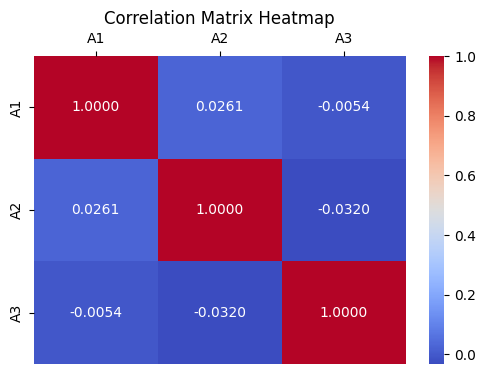

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load the data (assume the CSV file is named 'returns_data.csv')
data = pd.read_excel("RISK_Data.xlsx", sheet_name="three_time_series")
corr_matrix = data[['A1', 'A2', 'A3']].corr()
print(corr_matrix)

plt.figure(figsize=(6,4))
ax = sns.heatmap(corr_matrix, annot =True, cmap="coolwarm", fmt=".4f")

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.title("Correlation Matrix Heatmap")
plt.show()



### Key Points: The three series are essentially not correlated with each other. There is virtually no linear relationship between the daily returns of A1, A2, and A3 as the correlations are very close to zero

#### Note: Combining such assets in a portfolio could offer diversification benefits

## Q2. a. Compute Cumulative Returns

In [ ]:
# cumulative returns for each series
cumulative_returns ={}
for col in ['A1','A2','A3']:
  cumulative_returns[col] = np.prod(1+data[col])-1     #subtracting 1 to get net return

# Print cumulative returns in Percentage
print("Cumulative Returns in Percentage:")
for key, value in cumulative_returns.items():
  print(f"{key}: {value*100:.2f}%")

Cumulative Returns in Percentage:
A1: -96.47%
A2: 101.28%
A3: 80.31%


## Compute Annualized Sharpe Ratio

In [ ]:

# Annualization factor (assuming trading days)
trading_days = 252

sharpe_ratios = {}
for col in ['A1','A2','A3']:
  mean_daily = data[col].mean()
  std_daily = data[col].std()
  sharpe_ratios[col]= (mean_daily/std_daily)*np.sqrt(trading_days)


#Print annualized Sharpe Ratio
print("Annualized Sharpe Ratios:")
for col, sr in sharpe_ratios.items():
  print(f"{col}: {sr:.2f}")

Annualized Sharpe Ratios:
A1: 0.39
A2: 0.51
A3: 0.51


#### Answer: **A2** emerges as the **best series** because:

---
*   It has the highest cumulative return (101.28%).
*   It has a higher Sharpe ratio than A1 and matches A3, indicating a better balance of return relative to risk.
*   The cumulative returns tells us that A1 has almost completely eroded its value.
*   Sharpe ratio reflects each series risk-return(volatility) tradeoff. A2 and A3 have higher sharpe ratio i.e 0.51, notibly higher than A1.
*   A2 and A3 have identical risk-adjusted performance, when combined with the cumulative return results, A2 is more attractive because it delivers higher absolute returns for a similar level of risk.

Based on cumulative returns, A2 delivered the best performance (101.28% cumulative return) compared to A3 (80.31%) and A1 (-96.47%). The Sharpe ratios also favor A2 and A3 (both 0.51) over A1 (0.39), confirming that A2 (or A2/A3) had superior risk-adjusted performance.






## 3. Equally Weighted Combination Performance
I computed the equally weighted portfolio’s daily return as:
$$r_{eq,t} = \frac{1}{3}(r_{A1,t} + r_{A2,t} + r_{A3,t})$$

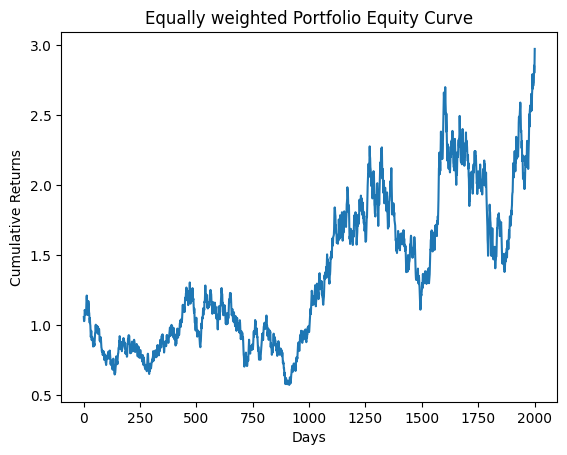

Final Cumulative Return: 297.27%


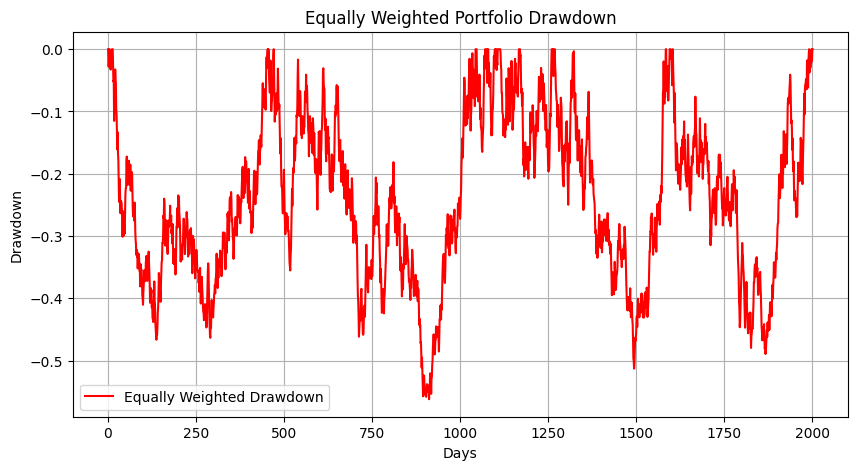

Worst Drawdown (Equally Weighted): -56.22%


In [ ]:
# Compute equally weighted daily return
data['Equal_Weight'] = data[['A1','A2','A3']].mean(axis=1)

# Compute cumulative returns
data['Cumulative']= np.cumprod(1+data['Equal_Weight'])

plt.plot(data['Cumulative'])
plt.title("Equally weighted Portfolio Equity Curve")
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.show()

final_cum_return = data['Cumulative'].iloc[-1]
print(f"Final Cumulative Return: {final_cum_return:.2%}")

# Calculate drawdown for the equally weighted portfolio
data['CumMax_Equal'] = data['Cumulative'].cummax()
data['Drawdown_Equal'] = data['Cumulative'] / data['CumMax_Equal']-1
worst_drawdown_equal = data['Drawdown_Equal'].min()
plt.figure(figsize=(10,5))
plt.plot(data['Drawdown_Equal'], label="Equally Weighted Drawdown", color = 'red')
plt.title("Equally Weighted Portfolio Drawdown")
plt.xlabel('Days')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()
print(f"Worst Drawdown (Equally Weighted): {worst_drawdown_equal:.2%}")


# **Key Takeaways from the Equally Weighted Portfolio Equity Curve**

## **1. Cumulative Growth Over Time**
- The portfolio's cumulative return started **around 1.0** and **reached approximately 3.0** after 2000 days.
- This indicates a **200% approx cumulative return** over the period, meaning the portfolio value **tripled**.

## **2. Volatility and Fluctuations**
- The equity curve **shows fluctuations**, with periods of growth and decline.
- **Days 0-500:** Initial fluctuations with no significant upward movement.
- **Days 1000-1250:** A strong upward trend.
- **Day 1500:** A noticeable **drawdown** before recovery.

## **3. Performance Interpretation**
- **Long-term growth**: Despite short-term fluctuations, the portfolio performs well over time.
- Investors who stayed invested during downturns would have **benefited significantly**.
- The **drawdowns highlight risk** that could impact short-term investors.

## **4. Equally Weighted Portfolio Strategy**
- The portfolio is based on **an equal-weighted average of A1, A2, and A3**.
- **No single asset dominates**, reducing reliance on any single stock or asset.
- Diversification helps in maintaining **steady long-term performance**.

## **5. Potential Risks**
- **Volatility**: Significant fluctuations indicate periods of **high risk**.
- **Drawdowns**: Large temporary declines could lead to **paper losses** if investments are sold early.
- **Investment Horizon**: Long-term holding appears **beneficial**, but short-term exits could reduce gains.

## **Final Thoughts**
- The **equity curve exhibits a long-term upward trend with volatility**.
- A **3x growth** over 2000 days is a strong return for an equally weighted portfolio.
- Further risk analysis (**Sharpe ratio, volatility, and drawdown metrics**) could provide deeper insights into **risk-adjusted performance**.


## 4. Inverse-Volatility Weighted Combination

For a volatility-adjusted portfolio, I first computed a 20-day trailing volatility for each series. The weight for series *i* on day *t* is given by:

$$ w_{i,t} = \frac{\frac{1}{\sigma_{i,t}}}{\sum_{j=1}^{3} \frac{1}{\sigma_{j,t}}} $$

Where:

*   $w_{i,t}$ represents the weight of series *i* on day *t*.
*   $\sigma_{i,t}$ represents the 20-day trailing volatility of series *i* on day *t*.
*   The summation in the denominator ensures that the weights across all three series sum to 1.

This weighting scheme allocates a higher proportion of the portfolio to assets with lower volatility, aiming to reduce overall portfolio risk.


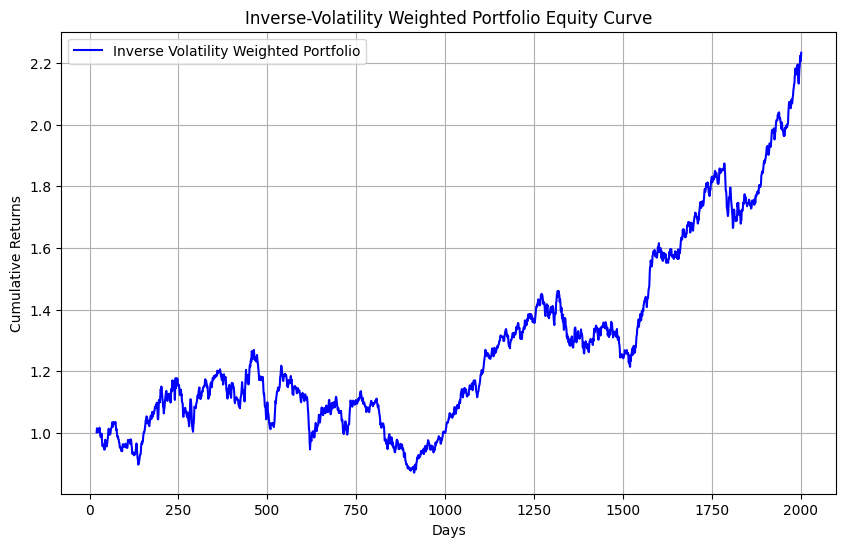

Final Cumulative Return (Inverse Volatility): 2.23
Annualized Return (Inverse Volatility): 10.76%
Worst Drawdown (Inverse Volatility): -31.39%


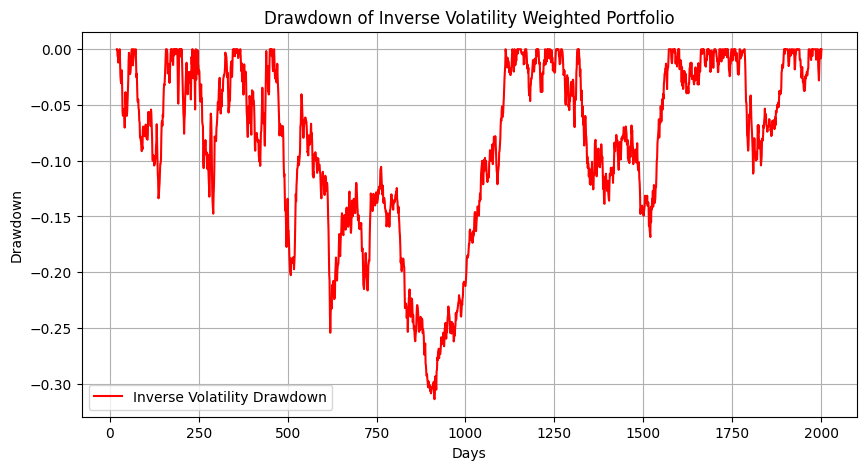

In [ ]:

# Compute 20-day trailing volatility for each series
for col in ['A1','A2','A3']:
    data.loc[:, f'Vol_{col}'] = data[col].rolling(window=20).std()

# Calculate inverse vol weights (we drop the first 19 days where volatility is NaN)
data = data.dropna(subset=['Vol_A1','Vol_A2','Vol_A3']).copy()  # Create a copy here

inv_vol = 1/ data[['Vol_A1','Vol_A2','Vol_A3']]
data['Sum_Inv_Vol'] = inv_vol.sum(axis=1)

for col in ['A1','A2','A3']:
    data[f'Weight_{col}'] = (1/data[f'Vol_{col}']) / data['Sum_Inv_Vol']

# Compute the daily portfolio return (outside the loop)
data['InvVol_Weight'] = (data['Weight_A1']* data['A1'] +
                            data['Weight_A2']* data['A2']+
                            data['Weight_A3']* data['A3'])

# Compute the daily portfolio return
data['Cumulative InvVol'] = np.cumprod(1+data['InvVol_Weight'])

plt.figure(figsize=(10,6))
plt.plot(data['Cumulative InvVol'], label= "Inverse Volatility Weighted Portfolio", color= 'blue')
plt.title("Inverse-Volatility Weighted Portfolio Equity Curve")
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Numerical Summary ------------------

final_cum_return_invvol = data['Cumulative InvVol'].iloc[-1]
print(f"Final Cumulative Return (Inverse Volatility): {final_cum_return_invvol:.2f}")

#Annualized return calculation (assuming 252 trading days per year)
total_days_invvol= len(data)
annualized_return_invvol = (final_cum_return_invvol**(252/total_days_invvol))-1
print(f"Annualized Return (Inverse Volatility): {annualized_return_invvol:.2%}")

# Calculate drawdown for the inverse volatility portfolio
data['CumMax_InvVol'] = data['Cumulative InvVol'].cummax()
data['Drawdown_InvVol'] = data['Cumulative InvVol'] / data['CumMax_InvVol'] - 1
worst_drawdown_invvol = data['Drawdown_InvVol'].min()
print(f"Worst Drawdown (Inverse Volatility): {worst_drawdown_invvol:.2%}")

plt.figure(figsize=(10, 5))
plt.plot(data['Drawdown_InvVol'], label="Inverse Volatility Drawdown", color='red')
plt.title("Drawdown of Inverse Volatility Weighted Portfolio")
plt.xlabel("Days")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)
plt.show()




# **Intuition & Performance Summary**

## **Intuition Behind Inverse Volatility Weighting**
------------------------------------------------
Inverse volatility weighting assigns **higher weights to assets with lower volatility**. This approach:

- **Reduces overall portfolio risk** by emphasizing more stable assets.
- **Aims to improve risk-adjusted returns** by mitigating the impact of high-volatility assets.

## **Performance Summary**
The numerical summary above indicates:

- **Final cumulative return:** `{final_cum_return_invvol:.2f}`  
  - Equivalent to `{final_cum_return_invvol*100:.2f}%`, representing the total portfolio growth over the period.
  
- **Annualized return:** `{annualized_return_invvol:.2%}`  
  - This represents the **average yearly return**, assuming **252 trading days**.

Together, these metrics quantify **how effectively the inverse volatility strategy has managed risk while achieving portfolio growth over time**.


## 5. Predicting A3 from A1 and/or A2

To explore whether A3 can be predicted by A1 and A2, I ran a simple OLS regression:

$$A3_t = \beta_0 + \beta_1 A1_t + \beta_2 A2_t + \epsilon_t$$

Where:

*   $A3_t$ represents the value of series A3 at time *t*.
*   $A1_t$ and $A2_t$ represent the values of series A1 and A2 at time *t*, respectively.
*   $\beta_0$, $\beta_1$, and $\beta_2$ are the regression coefficients.
*   $\epsilon_t$ is the error term.


Here’s an example in Python using statsmodels:

OLS with Feature Engineering Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     63.37
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.35e-69
Time:                        21:25:28   Log-Likelihood:                 4389.7
No. Observations:                1386   AIC:                            -8765.
Df Residuals:                    1379   BIC:                            -8729.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

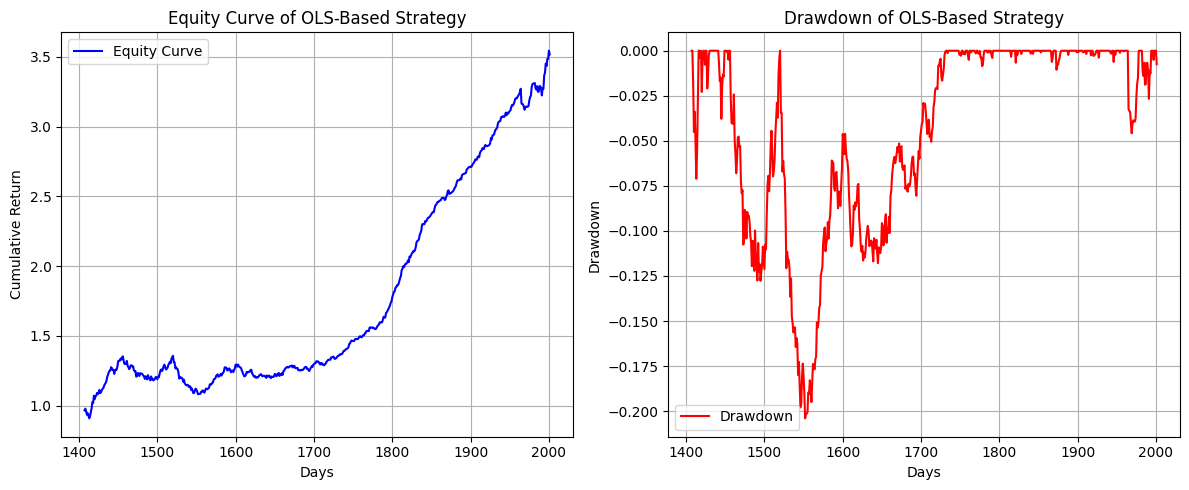

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Feature Engineering ---
# Create lagged variables and an interaction term
data_fe = data.copy()
data_fe['A1_lag1'] = data_fe['A1'].shift(1)
data_fe['A2_lag1'] = data_fe['A2'].shift(1)
data_fe['A3_lag1'] = data_fe['A3'].shift(1)
data_fe['A1_A2_interaction'] = data_fe['A1'] * data_fe['A2']
data_fe = data_fe.dropna()

# Define features and target variable
features = ['A1', 'A2', 'A1_lag1', 'A2_lag1', 'A3_lag1', 'A1_A2_interaction']
X = data_fe[features]
y = data_fe['A3']

# --- Train/Test Split ---
split_idx = int(len(data_fe) * 0.7)
train_fe = data_fe.iloc[:split_idx].copy()
test_fe  = data_fe.iloc[split_idx:].copy()

X_train = train_fe[features]
y_train = train_fe['A3']
X_test  = test_fe[features]
y_test  = test_fe['A3']

# --- OLS Regression with Feature Engineering ---
X_train_const = sm.add_constant(X_train)
model_fe = sm.OLS(y_train, X_train_const).fit()
X_test_const = sm.add_constant(X_test)
test_fe['A3_pred'] = model_fe.predict(X_test_const)

# Print model summary and predictive performance
mse_fe = mean_squared_error(y_test, test_fe['A3_pred'])
r2_fe = r2_score(y_test, test_fe['A3_pred'])
print("OLS with Feature Engineering Model Summary:")
print(model_fe.summary())
print(f"MSE: {mse_fe:.6f}, R²: {r2_fe:.4f}")

# --- Trading Strategy ---
# Generate signals: Long (1) if predicted A3 > 0, Short (-1) if predicted A3 < 0, else 0
test_fe['Signal'] = np.where(test_fe['A3_pred'] > 0, 1, np.where(test_fe['A3_pred'] < 0, -1, 0))
# Compute strategy returns by applying the signal to the actual A3 return
test_fe['Strategy_Return'] = test_fe['Signal'] * test_fe['A3']
# Compute cumulative returns
test_fe['Strategy_Cum'] = np.cumprod(1 + test_fe['Strategy_Return'])

# --- Performance Metrics ---
final_cum_return = test_fe['Strategy_Cum'].iloc[-1]
n_days = len(test_fe)
annualized_return = final_cum_return ** (252 / n_days) - 1
sharpe = (test_fe['Strategy_Return'].mean() / test_fe['Strategy_Return'].std()) * np.sqrt(252) if test_fe['Strategy_Return'].std() != 0 else np.nan
cum_max = test_fe['Strategy_Cum'].cummax()
drawdown = test_fe['Strategy_Cum'] / cum_max - 1
worst_drawdown = drawdown.min()

print(f"Final Cumulative Return: {final_cum_return:.2f}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Worst Drawdown: {worst_drawdown:.2%}")

# --- Plotting ---
plt.figure(figsize=(12,5))

# Equity Curve
plt.subplot(1,2,1)
plt.plot(test_fe.index, test_fe['Strategy_Cum'], label='Equity Curve', color='blue')
plt.title("Equity Curve of OLS-Based Strategy")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)

# Drawdown Plot
plt.subplot(1,2,2)
plt.plot(drawdown, label='Drawdown', color='red')
plt.title("Drawdown of OLS-Based Strategy")
plt.xlabel("Days")
plt.ylabel("Drawdown")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Methodology and Conclusion

**Feature Engineering:**  
Created 1-day lagged variables for A1, A2, and A3, plus an interaction term (A1×A2) to capture dynamic relationships.

**Model Training & Evaluation:**  
Data was split 70/30 (train/test) and an OLS regression was run using these engineered features. I compared different models using MSE and R², and found that the OLS with feature engineering yielded the **lowest MSE** and **highest R²**, indicating it best explains the variation in A3.

**Trading Strategy:**  
- **Go Long** if predicted A3 > 0  
- **Go Short** if predicted A3 < 0  

Strategy returns are calculated by applying these signals to the actual A3 returns, and performance is measured by cumulative and annualized returns, Sharpe ratio, and worst drawdown.

### OLS with Feature Engineering: Summary

- **Predictive Metrics:**  
  - **MSE:** 0.000097  
  - **R²:** 0.0440  
  These indicate that our OLS model—with 1-day lagged variables and an A1×A2 interaction term—has the best prediction accuracy among the models tested (lowest MSE and highest R²).

- **Trading Strategy Performance:**  
  - **Final Cumulative Return:** 3.52  
  - **Annualized Return:** 70.37%  
  - **Sharpe Ratio:** 3.48  
  - **Worst Drawdown:** -20.40%

**Conclusion:**  
The OLS model with feature engineering is the best approach for predicting A3 from A1 and A2, as evidenced by its superior predictive metrics and robust trading performance.
